# Color


Look up on a clear night, far away from city lights, and you will see thousands of stars. If you look closer, you might notice that the stars shine with an amazing variety of colors. Some glow dull red, some blue, some yellow like the sun, and some bright white. The picture to the right shows three stars - red, blue, and white - as seen by SDSS.
<img src="imgs/multicolor3.jpg" align=right />
But what exactly is color? Why do stars have different colors? And what can you learn by studying the colors of stars, galaxies, and other objects? Click "Next" to find out.

## Colors of Stars in the SDSS

First, take a look at some of the stars in the SDSS database. The next two Explore exercises will let you examine stars with SkyServer. You will see the colors for yourself, and you will try to discover patterns that could explain why stars come in different colors.

In [1]:
import pandas as pd
stars = pd.read_csv("../spectral_type/data/optical_search_373198.csv")
stars_mag = pd.read_csv("data/Skyserver_SQL4_15_2020 3_34_20 PM.csv")

In [2]:
def HMS2deg(ra, dec):
    """
    Convert H:M:S to degree
    """
    try:
        D, M, S = [float(i) for i in dec.split(":")]
        ds = 1
        if str(D)[0] == '-':
            ds, D = -1, abs(D)       
        deg = D + (M/60) + (S/3600)
        dec = deg*ds

        H, M, S = [float(i) for i in ra.split(":")]
        rs = 1
        if str(H)[0] == '-':
            rs, H = -1, abs(H)    
        deg = (H*15) + (M/4) + (S/240)
        ra = deg*rs
        return ra,dec
    except:
        raise
        return None

In [3]:
stars["ra"] = stars["ra"].str.strip('\'')
stars["dec"] = stars["dec"].str.strip('\'')
stars["ra_f"],stars["dec_f"] = zip(*stars.apply(lambda x: HMS2deg(x["ra"],x["dec"]),axis=1))

In [16]:
minra,maxra,mindec,maxdec = stars_mag["ra"].min(),stars_mag["ra"].max(),stars_mag["dec"].min(),stars_mag["dec"].max()

In [18]:
stars = stars[(stars["ra_f"]>minra) & (stars["ra_f"]<maxra) & (stars["dec_f"]>mindec) & (stars["dec_f"]<maxdec)]

In [19]:
import requests
from PIL import Image
import os
sklink = "http://skyserver.sdss.org/dr16/SkyServerWS/ImgCutout/getjpeg?TaskName=Skyserver.Chart.ShowNearest&ra={}&dec={}&scale={}"
def get_star_image(ra,dec,scale=0.2,radius=0.2):
    flink = sklink.format(ra,dec,scale)
    response = requests.get(flink)
    with open(f"imgs/{round(ra,2)}_{round(dec,2)}.jpg","wb") as f:
        f.write(response.content)
    img = Image.open(f"imgs/{round(ra,2)}_{round(dec,2)}.jpg")
    os.remove(f"imgs/{round(ra,2)}_{round(dec,2)}.jpg")
    return img

In [52]:
# selecting random 10 stars
ras = [0.756625, 356.96345833333334, 356.0495833333333, 5.316916666666667, 358.218, 356.883, 2.933291666666667, 2.6443333333333334, 1.54975, 0.7673333333333333, 3.264666666666667, 355.82145833333334, 3.7665, 0.8690416666666667, 5.5755, 2.4792083333333332, 4.876541666666666, 356.56941666666665, 4.080541666666667, 3.9284166666666667, 2.002625, 358.3899166666667, 355.340625, 357.021125, 5.6040833333333335, 357.7115, 5.611, 356.7355, 357.42075, 357.898125, 354.73516666666666, 354.33375, 356.608875, 359.0065416666667, 0.40725, 5.2218333333333335, 1.8753333333333333, 5.163083333333334, 357.1288333333333, 5.285, 5.538791666666667, 357.376625, 358.7463333333333, 358.02520833333335, 4.92275, 355.939, 356.66404166666666, 359.426625, 354.38095833333335, 358.4625833333333, 5.122916666666667, 2.001708333333333, 359.3990416666667, 356.9730833333333, 5.038458333333334, 4.91075, 1.5735416666666666, 4.373375, 0.630125, 2.2212083333333332, 354.728875, 0.9642916666666667, 5.787625, 4.465291666666666, 4.432833333333333, 1.623625]
decs = [0.5900527777777778, 0.4604638888888889, 0.09450277777777777, -0.6302527777777778, -1.1155111111111111, 0.003411111111111111, 0.5425444444444444, 0.1491111111111111, 0.5795833333333333, -4.6367666666666665, 1.1493194444444443, 0.8540555555555556, 0.9128333333333334, 0.50785, 0.3177027777777778, -0.7643333333333333, 1.2110583333333333, -0.47549166666666665, 0.8633333333333333, 0.45263333333333333, -4.232088888888889, 0.6574472222222223, 0.3810361111111111, -1.2345861111111112, -1.0550833333333334, -0.12018333333333334, 0.006466666666666667, -0.8400777777777778, -0.8143722222222223, -0.14026388888888888, -0.28401666666666664, 0.9398944444444445, 1.1594055555555554, -0.12075, -3.5202999999999998, 1.2034694444444445, -0.8021083333333334, -1.191638888888889, 1.0538611111111111, -0.9787, -1.177836111111111, -0.2492138888888889, 0.494975, -1.0971805555555554, -0.5143555555555556, -0.5901638888888889, -0.8553805555555556, -0.018233333333333334, 0.12285277777777778, 1.2401222222222223, -1.1644805555555555, 1.208411111111111, -0.7601722222222222, -0.27855833333333335, -0.6231194444444444, -0.9122833333333333, 1.1939166666666667, 0.02021111111111111, -0.13098888888888888, -4.589858333333333, -1.0811416666666667, -4.448594444444445, -0.5616972222222223, 0.1356888888888889, -1.1763305555555557, 1.240863888888889]
r_stars = stars[(stars["ra_f"].isin(ras)) & (stars["dec_f"].isin(decs))].sample(30)

In [59]:
# getting ras, decs
ras, decs = r_stars["ra_f"].tolist(), r_stars["dec_f"].tolist()

In [60]:
imgs = [get_star_image(ra,dec) for ra,dec in zip(ras,decs)]

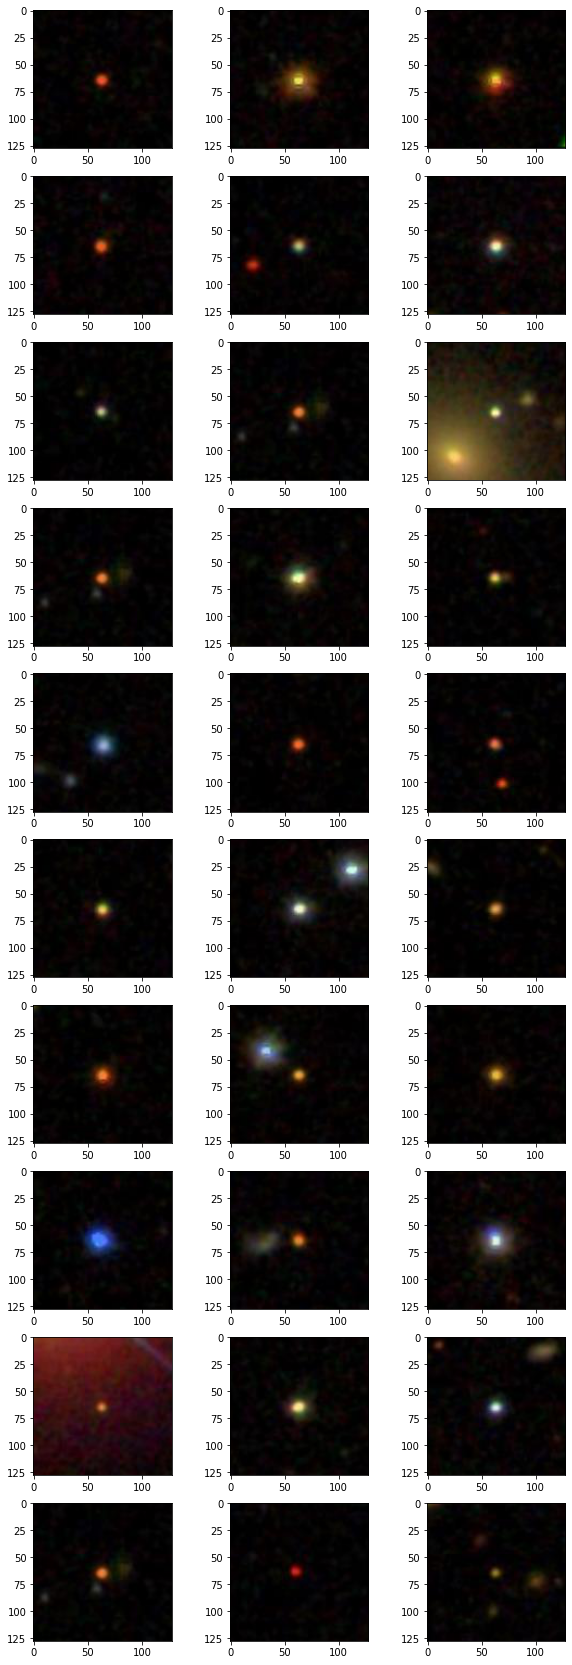

In [61]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(nrows=10,ncols=3,figsize=(10,30))
for i,im in enumerate(imgs):
    ax[i//3,i%3].imshow(im)

In [64]:
def get_mag(ra,dec):
    st = abs(stars_mag["ra"] - ra)**2+abs(stars_mag["dec"] - dec)**2
    m = stars_mag[st==st.min()].iloc[0]
    keys = ["u","g","r","i","z"]
    r = [round(m[k],2) for k in keys]
    return tuple(r)

In [65]:
r_stars["u"],r_stars["g"],r_stars["r"],r_stars["i"],r_stars["z"] = zip(*r_stars.apply(lambda x: get_mag(x["ra_f"],x["dec_f"]),axis=1))

In [66]:
r_stars["image"] = imgs

In [67]:
r_stars = r_stars[["ra_f","dec_f","u","g","r","i","z","image"]].reset_index(drop=True)

In [68]:
r_stars["g-r"] = round(r_stars["g"]-r_stars["r"],4)
r_stars["r-i"] = round(r_stars["r"]-r_stars["i"],4)
r_stars["u-g"] = round(r_stars["u"]-r_stars["g"],4)
r_stars["r-i"] = round(r_stars["r"]-r_stars["i"],4)
r_stars["i-z"] = round(r_stars["i"]-r_stars["z"],4)

In [71]:
r_stars.head(5)

,ra_f,dec_f,u,g,r,i,z,image,g-r,r-i,u-g,i-z
28,5.538792,-1.177836,24.21,24.56,22.45,19.82,17.97,<PIL.JpegImagePlugin.JpegImageFile image mode=...,2.11,2.63,-0.35,1.85
21,5.787625,-0.561697,16.56,16.28,16.57,16.83,17.14,<PIL.JpegImagePlugin.JpegImageFile image mode=...,-0.29,-0.26,0.28,-0.31
14,1.549750,0.579583,21.24,20.85,20.03,18.96,18.31,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0.82,1.07,0.39,0.65
26,358.389917,0.657447,19.28,18.33,18.02,17.90,17.85,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0.31,0.12,0.95,0.05
12,0.767333,-4.636767,19.44,18.43,18.38,18.37,18.37,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0.05,0.01,1.01,0.00


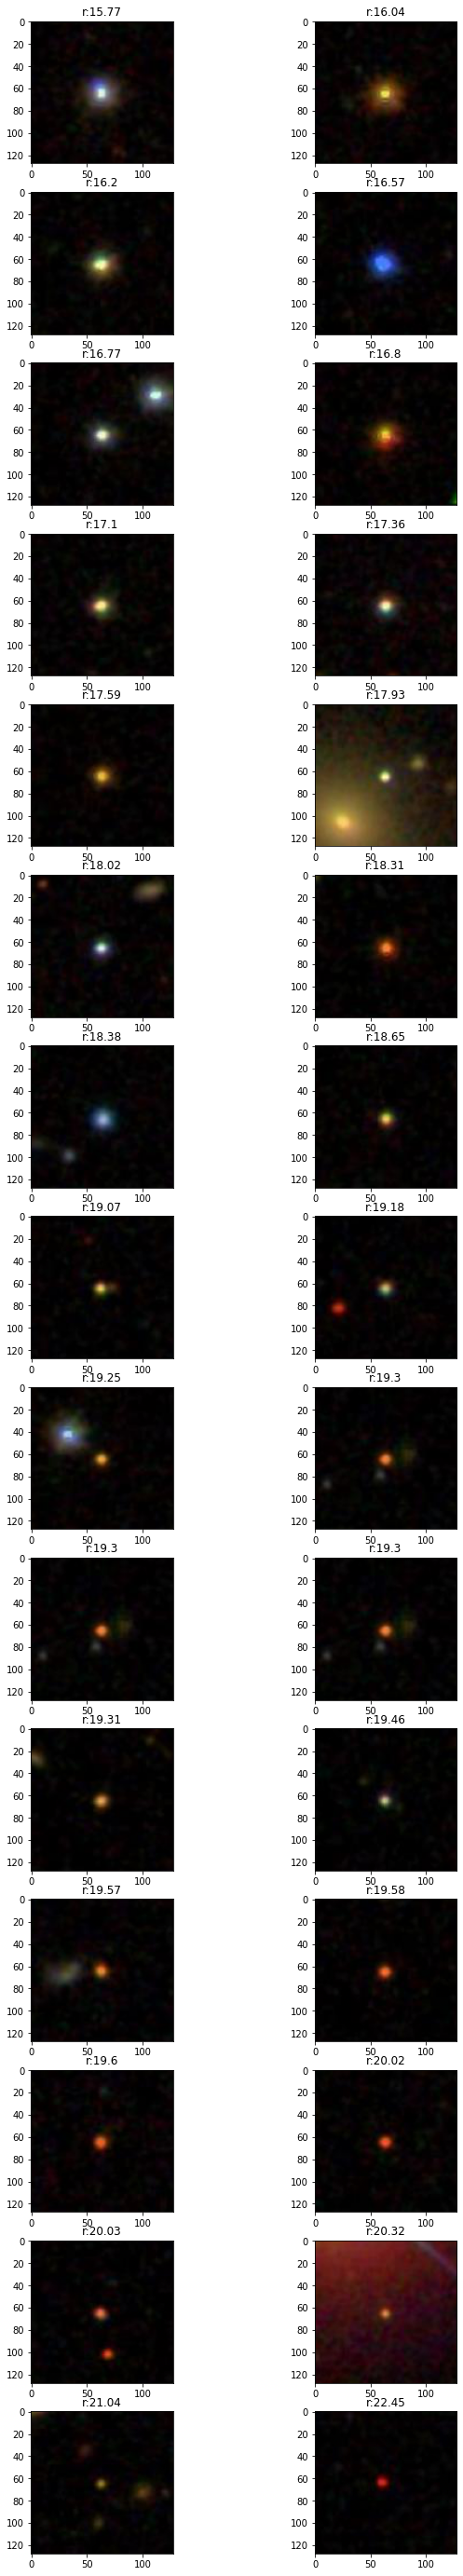

In [73]:
k = "r"
r_stars = r_stars.sort_values(k)
fig,ax = plt.subplots(nrows=15,ncols=2,figsize=(10,50))
for i in range(30):
    s = r_stars.iloc[i]
    ax[i//2,i%2].imshow(s["image"])
    ax[i//2,i%2].set_title(f"{k}:{s[k]}")

## The Definition of Color in Astronomy


In the last section, you looked at the colors of some stars in the SDSS database. You may have classified them as red, blue, yellow, or white. But you may have had trouble figuring out exactly what color some of the stars were. Was it red or orange? Yellow or white? Color is a subjective judgment; what one person calls "blue" may be a different shade than another person's "blue."
<img src="imgs/multicolor2.jpg" align=right />

If astronomers are going to learn anything from star color, they first need to have a definition of color that everyone can agree on; a measurement that everyone can make to compare the colors of different stars. The measurement they chose is the one you found in the last section: color is the difference in magnitude between two filters.



### Magnitude

Magnitude is a number that measures the brightness of a star or galaxy. In magnitude, higher numbers correspond to fainter objects, lower numbers to brighter objects; the very brightest objects have negative magnitudes.

 
An increase of one number in magnitude corresponds to a decrease in brightness by a factor of about 2.51 - a magnitude five object is 2.51 times fainter than a magnitude four object. The sun has magnitude 
-26. The brightest star in the Northern sky, Sirius, has magnitude 
-1.5. The faintest object you can see with your eyes has a magnitude of about 6; the faintest object the SDSS telescope can see has a magnitude of about 23. If you're curious about the magnitudes of other famous stars, take a look at this table of the 314 brightest stars.

When you say that a star has a certain magnitude, you must specify the color that the magnitude refers to. The magnitudes given above are magnitudes for yellow light.

SDSS measures magnitudes in five different colors by taking images through five color filters. A filter is a kind of screen that blocks out all light except for light with a specific color. The SDSS telescope's filters are green (g), red (r), and three colors that correspond to light not visible to the human eye: ultraviolet (u), and two infrared wavelengths (i and z). On SkyServer, the five magnitudes (through the five filters) of a star are symbolized by u, g, r, i, and z. The astronomers who planned the SDSS chose these filters to view a wide range of colors, while focusing on the colors of interesting celestial objects.

Color is symbolized by subtracting the magnitudes: u-g, g-r, r-i, and so on. Remember that all these quantities involve magnitude, so they decrease with increasing light output. A star with a high g-r color is redder than a star with a low g-r color.

In [203]:
import numpy as np
b314 = pd.read_csv("data/brightest314_fixed.csv")

In [204]:
def fix(x):
    if x[0] in [str(d) for d in range(10)]:
        return "+" + x
    return x
b314["rv"] = b314["rv"].apply(fix)

In [205]:
b314.to_csv("data/brightest314_fixed.csv",index=False)

In [206]:
b314

,name,resolved_if_double,ra,dec,v,b-v,spectral_type,pi,mv,d,mu,pa,rv,remarks,common_name,arabic_name
0,Sun,NaN,NaN,NaN,-26.75,0.63,G2 V,NaN,4.82,8,NaN,NaN,varies,NaN,Sun,NaN
1,alp And,NaN,00 08.2,+29 04,2.1v,-0.11,B9p IV:(HgMn),0.032,-0.4,100,0.209,139.0,-12 SB,NaN,Alpheratz,سرة الفرس
2,bet Cas,NaN,00 09.0,+59 08,2.3v,0.34,F2 III,0.072,2.0,45,0.555,109.0,+11 SB,"var: 2.25-2.31, 0.10d",Caph,الكف الخصيب
3,gam Peg,NaN,00 13.1,+15 10,2.8v,-0.23,B2 IV,0.000,-3.1,490,0.008,176.0,+4 SB,"var: 2.80-2.87, 0.15d",Algenib,الجنب
4,bet Hyi,NaN,00 25.4,-77 17,2.80,0.62,G1 IV,0.159,3.8,20,2.255,82.0,+23,NaN,NaN,NaN
5,alp Phe,NaN,00 26.2,-42 20,2.39,1.09,K0 IIIb,0.039,0.7,62,0.442,152.0,+75 SB,NaN,Ankaa,عنقاء
6,del And,A,00 39.2,+30 50,3.27,1.28,K3 III,0.028,-0.3,170,0.161,122.0,-7 SB,NaN,NaN,NaN
7,eta Cas,NaN,00 40.3,+56 31,2.23,1.17,K0 IIIa,0.016,-0.8,110,0.058,117.0,-4 V?,NaN,Schedar,صدر ذات الكرسي
8,bet Cet,NaN,00 43.5,-18 01,2.04,1.02,K0 III,0.061,0.3,53,0.234,81.0,+13,NaN,Diphda,الضفدع
9,eta Cas,A,00 49.0,+57 48,3.44,0.57,G0 V,0.176,4.7,18,1.218,115.0,+9 SB,"B: 7.51, K4 Ve, 12""",NaN,NaN
